<a href="https://colab.research.google.com/github/antndlcrx/Intro-to-Python-DPIR/blob/main/Week%204/W4_visualisations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://cdn.githubraw.com/antndlcrx/Intro-to-Python-DPIR/main/images/logo_dpir.png?raw=true:,  width=35" alt="My Image" width=175>  

# Visualisation with Matplotlib and Seaborn


## **1**.&nbsp; Why learn Matplotlib?

 <img src="https://cdn.githubraw.com/antndlcrx/Intro-to-Python-DPIR/main/images/W4/matplot_title_logo.png?raw=true:,  width=25" alt="My Image" width=175>

`matplotlib` is the base library for data visualisation that integrates well with `pandas`. Many visualisation libraries like `seaborn` are built on top of `matplotlib`. They provide great off-the shelf functionality, but for advanced custom modifications it is nice to know the fundamentals of `matplotlib`.



main `matplotlib` objects are:

- `Figure`: a single container that contains all the objects representing axes, graphics, text, and labels.
- `Axes`: a bounding box with ticks, grids, and labels, which will eventually contain the plot elements that make up our visualisation.


For more info, see [matplotlib documentation](https://matplotlib.org/).
For examples of what is possible with matplotlib, see [examples](https://matplotlib.org/stable/gallery/index.html).

<img src="https://cdn.githubraw.com/antndlcrx/Intro-to-Python-DPIR/main/images/W4/figure_anatomy.png?raw=true:,  width=25" alt="My Image" width=500>

In [1]:
import matplotlib.pyplot as plt # common alias
import numpy as np
import pandas as pd

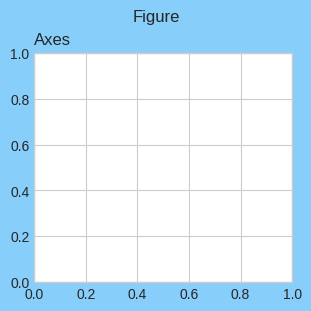

In [ ]:
fig = plt.figure(figsize=(3,3),
                 facecolor="lightskyblue",
                 layout="constrained")
fig.suptitle("Figure")
ax = fig.add_subplot()
ax.set_title("Axes", loc="left");

There are two ways to draw plots with `matplotlib`.

1. **Explicit object oriented** way: call plotting methods on the axes. We start be initialising an instance of a `Figure` and create one or more `Axes` objects, then call plotting methods on them.
2. **Implicit via Pyplot API**: The `pyplot` module shadows most of the `Axes` plotting methods to give the equivalent of the above, where the creation of the `Figure` and `Axes` is done for the user.

Source: [Matplotlib User Guide]("https://matplotlib.org/stable/users/explain/figure/api_interfaces.html").

**It is preferred to use the axis methods over the top-level plotting functions lik**e `plt.plot`.

The explicit method scales better, is less error-prone, allows better control over multiple plots.

There is a convenient `subplots` method that creates the new figure and returns np.array containing the created subplot objects.

| Argument   | Description |
|------------|------------|
| `nrows`    | Number of rows of subplots |
| `ncols`    | Number of columns of subplots |
| `sharex`   | All subplots should use the same x-axis ticks (adjusting the `xlim` will affect all subplots) |
| `sharey`   | All subplots should use the same y-axis ticks (adjusting the `ylim` will affect all subplots) |
| `subplot_kw` | Dictionary of keywords passed to `add_subplot` call used to create each subplot |
| `**fig_kw`  | Additional keywords to `subplots`, used when creating the figure, such as `plt.subplots(2, 2, figsize=(8, 6))` |



In [14]:
plt.subplots?

In [ ]:
x = np.linspace(0, 10, 100)

In [31]:
plt.plot?

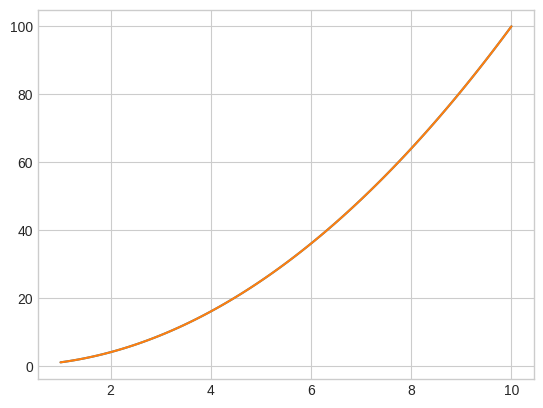

In [ ]:
# @title Example APIs
### Explicit Obj Oriented way

x = np.linspace(1,10, 100)
y = x ** 2

fig, ax = plt.subplots()

ax.plot(x, y);

### Equivalent Implicit
plt.plot(x, y);

### Axes Title, Labels, and Limits

- `set_xlim(left, right)`: Sets the x-axis limits for a specific `Axes` object.

- `set_ylim(bottom, top)`: Sets the y-axis limits for a specific `Axes` object.

- `xlim(left, right)`: Sets the x-axis limits at the figure level using `plt`.  

- `ylim(bottom, top)`: Sets the y-axis limits at the figure level using `plt`.  

- `set_title(title)`: Adds a title to the `Axes` object.  

- `set_xlabel(label)`: Sets the label for the x-axis.  

- `set_ylabel(label)`: Sets the label for the y-axis.  


(0.0, 6000.0)

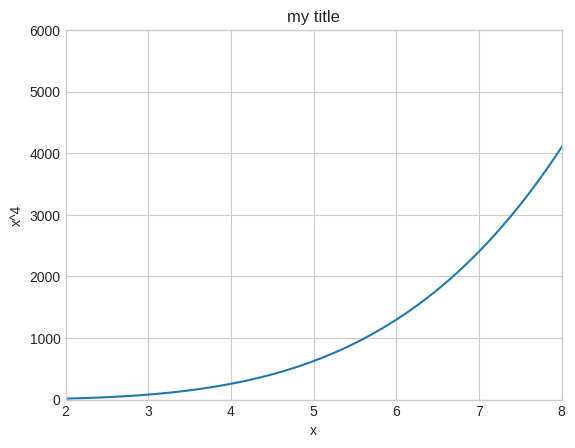

In [ ]:
#@title Example title, labels, lims
# axes limits with set_xlim(), set_ylim()

fig, ax = plt.subplots()

ax.plot(x, x**4)
ax.set_title('my title')
ax.set_xlabel("x")
ax.set_ylabel("x^4");
ax.set_xlim(2,8)
ax.set_ylim(0, 6000)


# alternatively with xlim and ylim on plt.
# plt.plot(x, np.sin(x), color="red", linestyle = ":")
# plt.xlim(2,8)
# plt.ylim(0.5, -0.5)

In the object-oriented interface to plotting, rather than calling these functions individually, it is often more convenient to use the `ax.set` method to set all these properties at once.

### Styles

In [53]:
# plt.style.available # choose one of default styles
plt.style.use("seaborn-v0_8-whitegrid")

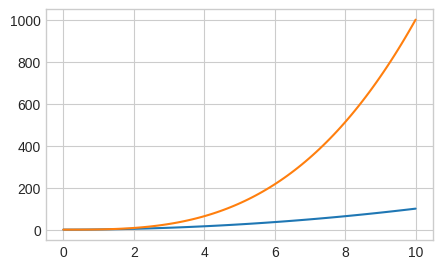

In [55]:
fig, ax = plt.subplots()

ax.plot(x, x**2)
ax.plot(x, x**3);

For customising style sheets and runtime configurations, see [User Guide]("https://matplotlib.org/stable/users/explain/customizing.html#customizing-with-style-sheets").

## **2**.&nbsp; Plot Types

### Line Plot


Below are various ways to customize individual lines in a Matplotlib line plot.


- `color`: Specifies the color of the line. You can use color names (e.g., `"blue"`), abbreviations (e.g., `"r"`), or hex codes (e.g., `"#1f77b4"`).

- `linestyle`: Defines the style of the line. Possible options include `"-"` (solid), `"--"` (dashed), `"-."` (dash-dot), and `":"` (dotted).

- `linewidth`: Sets the thickness of the line (e.g., `2` for a thicker line, `0.5` for a thinner line).

- `marker`: Adds markers for individual data points. Common markers include `"o"` (circle), `"s"` (square), and `"^"` (triangle).

- `markersize`: Determines the size of the markers (e.g., `5` for medium-sized markers, `10` for larger markers).

- `markerfacecolor`: Specifies the fill color of the marker interior (e.g., `"red"`).

- `markeredgecolor`: Sets the color of the marker boundary (e.g., `"black"`).

- `alpha`: Controls the transparency of lines or markers. Ranges from `0.0` (fully transparent) to `1.0` (fully opaque).

- `label`: Defines a text label for the line, which can be displayed in a legend.

- `legend()`: (Called as `plt.legend()` or `ax.legend()`) Enables a legend in your plot area to identify the labeled lines.


In [56]:
x = np.linspace(0, 10, 100)

In [60]:
plt.legend?

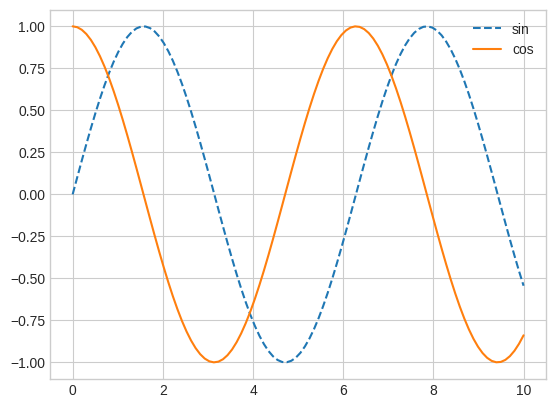

In [57]:
#@title Example Line

fig1 = plt.figure()
ax1 = plt.axes()

ax1.plot(x, np.sin(x), linestyle="--", label="sin")
ax1.plot(x, np.cos(x), linestyle="-", label="cos");
ax1.legend()


fig.savefig("tour_name.png")
# fig.canvas.get_supported_filetypes() # displays all supported file types

### Scatter Plot

`.scatter` method is there for creating scatterplots. It helps to map individual data points and customise how the data points are plotted.

useful params:

- `s`: Specifies the size of each marker. Accepts a single numeric value or an array of values to set a size per point.

- `c`: Defines the color for each data point. This can be:
  - A single color (e.g., `"blue"`, `"r"`, `"#1f77b4"`)
  - A list of colors (one per data point)
  - A numeric array (used with a colormap)

- `alpha`: Controls the transparency of markers. Ranges from `0.0` (fully transparent) to `1.0` (fully opaque).

- `marker`: Determines the shape of the scatter points (e.g., `"o"` for circle, `"s"` for square, `"^"` for triangle).

- `edgecolors`: Sets the edge color of the markers (e.g., `"black"`, `"none"`). When `"none"`, no edge is drawn.

- `label`: Assigns a label to the scatter plot, which can be displayed in a legend via `plt.legend()`.

and many more, check `plt.scatter?`

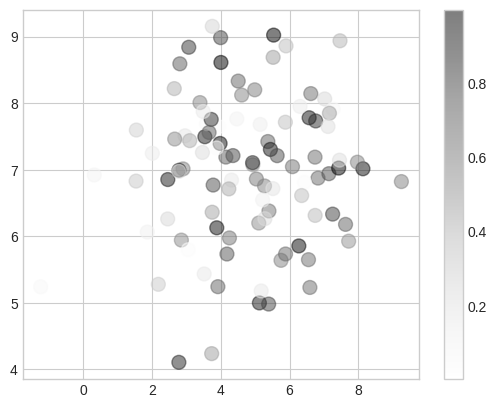

In [ ]:
#@title Example Scatterplot
fig, ax = plt.subplots()


colors = np.random.uniform(0,1,100)
plt.scatter(x, y, s=100, alpha=0.5, c=colors)
plt.colorbar();

### Histogram

Use `plt.hist` to map distributions of your data. Useful parameters:

- `bins`: defines the number of equal-width bins in the range. You can provide an integer to specify the number of bins or a sequence of bin edges.
- `alpha`: sets the transparency of the histogram bars, ranging from 0 (transparent) to 1 (opaque).
- `histtype`: specifies the type of histogram to draw. Options include:
    - `bar`: traditional bar-style histogram (default)
    - `barstacked`: stacked bar histogram
    - `step`: draw outline of a histogram instead of a solid bar.
    - `stepfilled` same as above but fill the outline, creating a "siluette" of a histogram.

For more options, see `plt.hist?`.

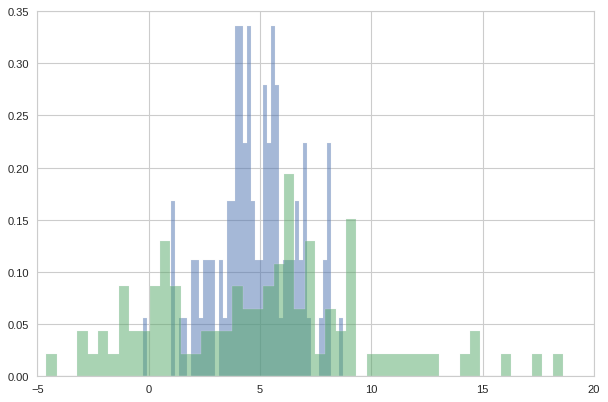

In [ ]:
#@title Example Histogram

np.random.seed(42)
x = np.random.normal(5,2,100)
y = np.random.normal(5,5,100)

args = dict(histtype="stepfilled",
            alpha=0.5,
            bins=50,
            density=True)

fig = plt.figure()
plt.hist(x, **args, label="5")
plt.hist(y, **args, label="7");

## **3**.&nbsp; Plot Cosmetics

### Legends



A legend helps identify different elements (lines, markers, bars, etc.) in your plot. You can place legends in various locations and format them to suit your needs using `plt.legend()` or `ax.legend()`.

Call this function after labeling your plot elements (using the `label` parameter).

Main parameters:
- `loc`: set the legend location (e.g., `"upper left"`, `"lower right"`, `"best"`).
- `title`: add a title inside the legend.
- `ncol`: specify the number of columns in the legend.
- `fontsize`: control the text size.
- `frameon`: toggle the legend’s bounding box (`True` by default).
- `fancybox`: give the legend box rounded corners when `frameon=True` (`True` by default).



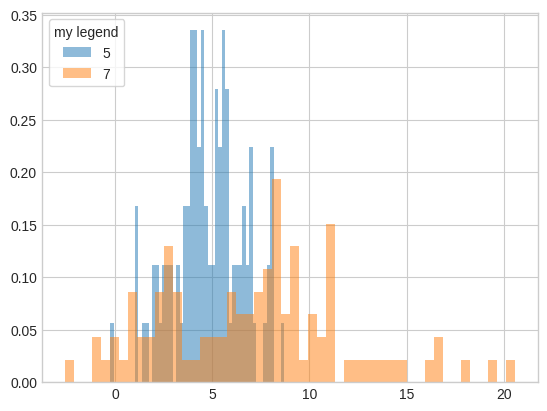

In [104]:
fig = plt.figure()

np.random.seed(42)
x = np.random.normal(5,2,100)
y = np.random.normal(7,5,100)

args = dict(histtype="stepfilled",
            alpha=0.5,
            bins=50,
            density=True)

plt.hist(x, **args, label="5")
plt.hist(y, **args, label="7")
plt.legend(loc="upper left", frameon=True, ncol=1,
           title="my legend");

### Tick Customisation

Control what tick marks are displayed on the axes and how their labels appear. You can manipulate tick positions, formats, rotations, and more.

`plt.xticks()` and `plt.yticks()`: Set positions and labels of the ticks on the x-axis or y-axis.

Parameters include:
- `ticks`: a list of positions
- `labels`: custom text labels
- `rotation`: rotate the text (e.g., 45 degrees)
- `fontsize`: control label size

Alternatively, when working with an Axes object (ax), you can use:

`ax.set_xticks(`), `ax.set_xticklabels()`
`ax.set_yticks()`, `ax.set_yticklabels()`

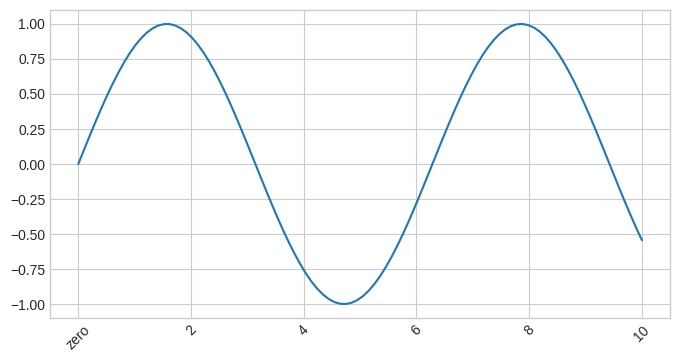

In [105]:
x = np.linspace(0, 10, 100)
y = np.sin(x)

plt.figure(figsize=(8, 4))
plt.plot(x, y)

tick_positions = [0, 2, 4, 6, 8, 10]
tick_labels = ["zero", "2", "4", "6", "8", "10"]

plt.xticks(tick_positions, tick_labels, rotation=45, fontsize=10);

### Text Annotation

You can annotate text with the `plt.text` method.  The method takes an x position, a y position, a string, and then optional keywords specifying the color, size, style, alignment, and other properties of the text.

key parameters:
- **Positioning**: The first two arguments to `plt.text` are the x and y coordinates where you want the text to appear. These coordinates are in the data coordinate system of your plot.
- **Text string**: The text you want to display.
- `color`: text color.
- `size`: text size.
- `weight`: Controls the font weight (e.g., 'normal', 'bold', 'heavy').
- `ha`: Specifies the horizontal alignment ('center', 'right', 'left').
- `va`: Specifies the vertical alignment ('center', 'top', 'bottom').
- `bbox`: Draw a box around the text.

For more, see the `plt.text?` for docstring.

Text(1.57, 1.0, 'My Peak')

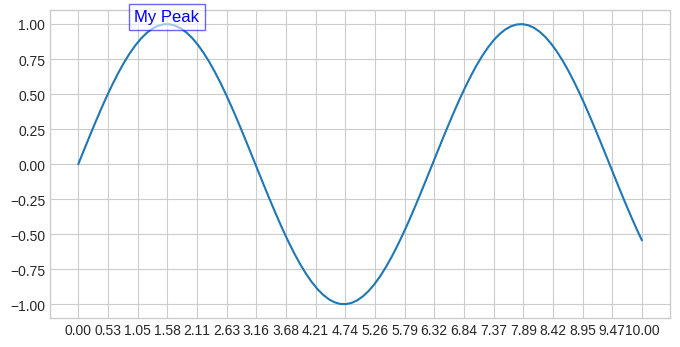

In [123]:
x = np.linspace(0, 10, 100)
y = np.sin(x)

plt.figure(figsize=(8, 4))
plt.plot(x, y)

tick_positions = np.linspace(0, 10, 20)
plt.xticks(tick_positions)

plt.text(
    1.57,  # approximately π/2
    1.0,
    "My Peak",
    fontsize=12,
    color="blue",
    va="bottom",
    ha="center",
    bbox=dict(facecolor="white", edgecolor="blue", alpha=0.6)
)

`plt.annotate()` allows you to add text labels and arrows that highlight specific coordinates or ranges in your plot.

key parameters:

- `text`: The annotation text.
- `xy`: The point (in data coordinates) to label.
- `xytext`: The position (in data or offset coordinates) where the text is placed.
- `arrowprops`: A dictionary of arrow properties (e.g., arrow style, color, shrink factor).
- `ha` / `va`: Horizontal and vertical alignment for the text (`"center"`, `"left"`, `"right"`, etc.).


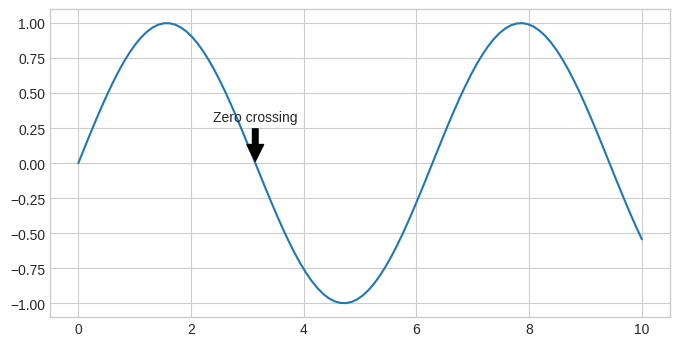

In [131]:
x = np.linspace(0, 10, 100)
y = np.sin(x)

plt.figure(figsize=(8, 4))
plt.plot(x, y)

plt.annotate(
    "Zero crossing",
    xy=(3.14, 0),        # approximately π
    xytext=(3.14, 0.3),  # text position for the annotation
    arrowprops=dict(facecolor="black", shrink=0.05),
    ha="center"
);

Text(2, 1.2, 'Local Max')

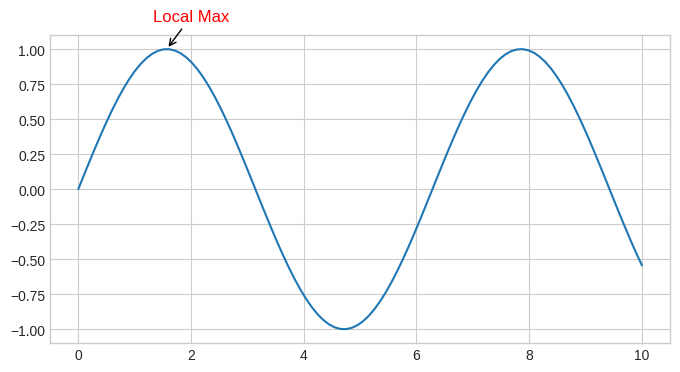

In [132]:
fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(x, y)

ax.annotate(
    "Local Max",
    xy=(1.57, 1),         # ~ π/2, where sine is 1
    xytext=(2, 1.2),      # slightly to the right and above the max
    arrowprops=dict(
        arrowstyle="->",
        facecolor="red"
    ),
    ha="center",
    fontsize=12,
    color="red"
)

## **4**.&nbsp; Extra: Subplots and Mosaic

`subplot_mosaic` is a convenient function that allows you to define a custom layout of subplots using a nested dictionary or a layout string. Each label in the layout defines a separate subplot, making complex, creative figure arrangements simpler to specify.

key params:
- `mosaic`: A dictionary or a layout string describing how subplots should be arranged and labeled.

For an extensive guide, refer to [documentation]("https://matplotlib.org/stable/users/explain/axes/mosaic.html#mosaic").

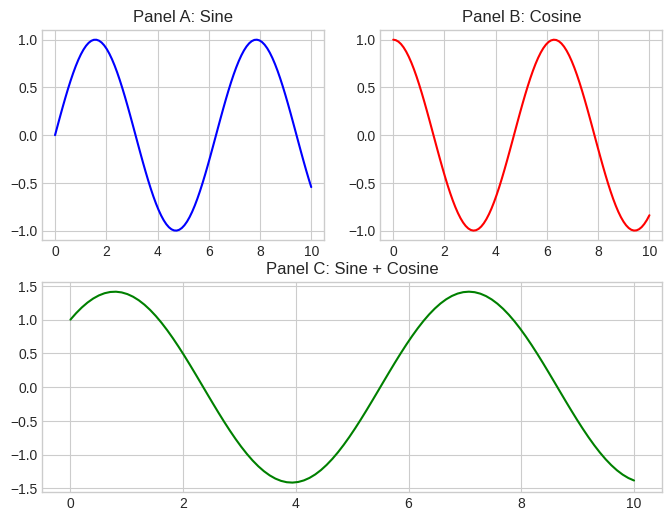

In [ ]:
x = np.linspace(0, 10, 100)
y = np.sin(x)
z = np.cos(x)

layout = [
    ["A", "B"],
    ["C", "C"]
]

fig, axes = plt.subplot_mosaic(layout, figsize=(8, 6))

axes["A"].plot(x, y, label="Sine", color="blue")
axes["A"].set_title("Panel A: Sine")

axes["B"].plot(x, z, label="Cosine", color="red")
axes["B"].set_title("Panel B: Cosine")

axes["C"].plot(x, y + z, label="Combined", color="green")
axes["C"].set_title("Panel C: Sine + Cosine");

## Excersises

In [ ]:
# 1: create a figure with three subplots

# 2: for subpot one, create a visualisation for x and y, where x is a continous
# array of numbers, and y is a x^n. Include three different y's. Include a legend
# describing each y and a title for the subplot.

# 3: for subplot two, make a scatterplot describing a negative linear relationship
# between a random x and y. Make sure x and y are not perfectly linear.
# Annotate the point which has largest x and y value. Include a title for the subplot.

# 4: for subplot three, plot a histogram of x, which should be a normally distributed variable,
# and a y which should have a right skew distribution. Include a legend and a title to the plot.




In [133]:
!git clone https://github.com/antndlcrx/Intro-to-Python-DPIR.git

Cloning into 'Intro-to-Python-DPIR'...
remote: Enumerating objects: 94, done.
remote: Counting objects: 100% (94/94), done.
remote: Compressing objects: 100% (81/81), done.
remote: Total 94 (delta 30), reused 56 (delta 9), pack-reused 0 (from 0)
Receiving objects: 100% (94/94), 1.30 MiB | 15.12 MiB/s, done.
Resolving deltas: 100% (30/30), done.


In [134]:
qog_link = '/content/Intro-to-Python-DPIR/datasets/qog2022.csv'
ppi_link = "/content/Intro-to-Python-DPIR/datasets/ppi.csv"

qog = pd.read_csv(qog_link)
ppi = pd.read_csv(ppi_link)

ppi = ppi.drop("Unnamed: 0", axis=1)

The example dataset has the following variables:

| Variable      | Description |
|--------------|-------------|
| **country**  | Country name |
| **iso3c**    | Country code (isocode-3) |
| **region**   | UN Region (continent) |
| **fh_status** | Freedom House Rating (Free, Partly Free, Not Free) |
| **perc_wip** | Proportion of women in parliament (World Development Indicators) |
| **hdi**      | Human Development Index (UN Development Programme) |
| **glob_index** | Index of Globalisation (1-100 scale: higher = more globalised) |
| **fh_polity**  | Freedom House Polity Score (0-10 scale: higher = more democratic) |
| **gdp_pc**     | Real GDP per capita (Maddison Project) |
| **corruption** | V-Dem corruption index (higher = more corrupt) |

In [ ]:
## Exercise

# Plot the relationship between "gdp_pc" and "corruption" conditional on freedom house status.

## **5**.&nbsp; Seaborn

<img src="https://cdn.githubraw.com/antndlcrx/Intro-to-Python-DPIR/main/images/W4/seaborn.jpg?raw=true:,  width=25" alt="My Image" width=175>

[Seaborn](https://seaborn.pydata.org/tutorial/introduction.html) is a library for making statistical graphics in Python. It builds on top of `matplotlib` and integrates closely with `pandas` data structures.

Seaborn's plotting functions operate on dataframes and arrays containing whole datasets and internally perform the necessary semantic mapping and statistical aggregation to produce informative plots.

Seaborn's API lets you focus on what the different elements of your plots mean, rather than on the details of how to draw them.

Visit [Example Gallery]("https://seaborn.pydata.org/examples/index.html") to see which plots seaborn can produce.

In [141]:
import seaborn as sns # common alias

For appearance customisation, check out [Seaborn Styles]("https://seaborn.pydata.org/tutorial/aesthetics.html").

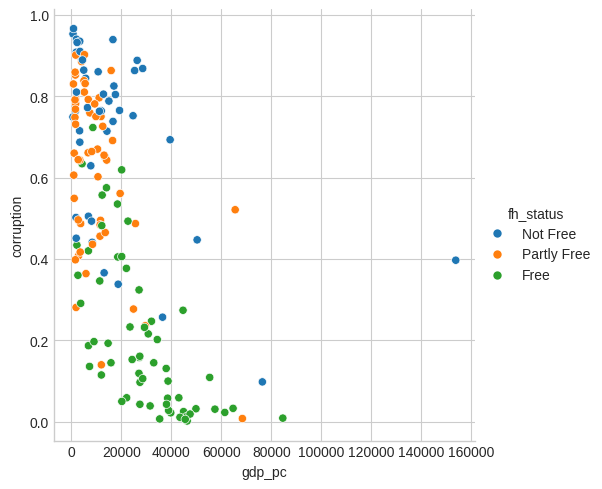

In [142]:
sns.relplot(qog, x="gdp_pc", y="corruption", hue="fh_status");

### Funciton level and Axes level functions

Seaborn functions can be categorised as axes-level and function-level, depending on which object they are operating on. Axes-level funcs operate on `matplotlib` `Axes` object, while function-level operate on seaborn `FacetGrid` object.

Figure-level funcs:

- `relplot`: visualises statistical relationships.
- `displot`: visualises variable distributions.
- `catplot`: visualises relationships with categorical data.

Axes-level funcs:
- `scatterplot`: Key params are:
    - `hue`: colors the points according to a third variable.
    - `size`: changes marker size according to a third variable.
    - `style`: changes marker style according to a third variable.
- `histplot`: Key params are:
    - `binwidth`: chooses size of the bins, default bin size is based on the variance of the data and the number of observations.
    - `bins`: choose number of bins. Can take an array specifying exact bin breaks.
    - `hue`: draw a separate histogram for each of a third variable's unique values and distinguish them by color.
    - `element`: choose the appearance of the histogram.
    - `multiple`: choose how multiple histograms are stacked.
- `boxplot`:

    - `x`, `y`, `hue`: Specify the variables to plot on each axis and optionally group by a third variable (`hue`).
    - `order`: Controls the order of categories along the axis (if categorical data).
    - `whis`: Defines the whisker length. Defaults to 1.5 times the IQR (interquartile range).
    - `fliersize`: Size of the markers used to show outlier points.


For more, see [Seaborn Documentation]("https://seaborn.pydata.org/tutorial/function_overview.html").

<img src="https://cdn.githubraw.com/antndlcrx/Intro-to-Python-DPIR/main/images/W4/seaborn_funcs.png?raw=true:,  width=25" alt="My Image" width=500>

In [ ]:
#@title Example sns functions
fig, ax = plt.subplots(2)
sns.histplot(data=qog, x="gdp_pc", ax=ax[0]);
sns.histplot(data=qog, x="corruption", ax=ax[1]);

sns.catplot(data=qog, y="region", x="corruption", kind="bar", hue="fh_status");

### Regression plots

Regression plots can be useful to showcase relationship between variables. There are two functions in Seaborn that do a regression plot:

- `regplot`: Axes-level function to plot a fit x to y from the data.
- `lmplot`: Figure-level function, does the same. Has a `hue` parameter which `regplot` does not have.

Key params:

- `x` and `y`: variables for the regression.
- `hue`: condition by a third variable, color appropriately.
- `order`: fit a ploynomial regression.
- `col`: set number of different columns based on a third variable.
- `robust`: make regression fit less sensitive to outliers.
- `logistic`: fit a logistic regression.



In [ ]:
#@title Example Regression plots
sns.lmplot(data=qog, x="corruption", y="hdi", order=2, hue="fh_status", col="fh_status");

### Faceted plots

The `FacetGrid` class helps assess distributions and or relationship between variables across mutliple contexts/groups.

A `FacetGrid` can be drawn with up to three dimensions:
- `row`: structures array of axes (determines n rows).
- `col`: structures array of axes (determines n cols).
- `hue`: determines the third dimension along a "depth" axis, where different levels are plotted with different colors.

Use following parameters to enhance the plot:
- `col_wrap`: If the number of col categories is too large to fit in one row, this wraps the columns into multiple rows.
- `margin_titles`: If `True`, moves the column and row labels to the margin for better readability.
- `height`: Controls the height of each subplot in inches.
- `aspect`: Controls the width-to-height ratio of each subplot (e.g., `aspect=1.5` makes plots 1.5 times wider than their height).
- `palette`: Defines the color palette used for different `hue` levels.

You can pass multiple customisation parameters for a `FacetGrid` with the `set()` method:
- `xlim` and `ylim`: Set the x-axis and y-axis limits for all facets.

Main method to draw the actual faceted plots is `map()`.


In [ ]:
#@title Example FacetGrid
g = sns.FacetGrid(qog, col="region", hue="fh_status",
                  col_wrap= 3, margin_titles=True)


g.map(sns.scatterplot, "gdp_pc", "corruption")
g.add_legend();

### Pair plots

`PairGrid` is a class in Seaborn designed for visualising pairwise relationships among variables in a dataset.

In contrast to `FacetGrid` which displays the *same* plot or relationship, but splits the data by other variables into multiple, `PairGrid` displays *different* plots for each pair of variables in your dataset.

The usage is very similar.

In [ ]:
#@title PairGrid example
g = sns.PairGrid(qog, vars=["gdp_pc", "corruption", "perc_wip", "hdi"], hue="fh_status")
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend(title="Freedom House Status", adjust_subtitles=True);

In [ ]:
#@title PairGrid Example II
g = sns.PairGrid(qog)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.histplot)

## Exercises

In [ ]:
# 1: combine qog and ppi datasets

# 2: explore relationship between parliamentary power index and corruption,
# percentage of women in parliament, human development index, and globalisation index.

# 3: How do these relationships differ by region, and how by regime type?
# Use a different (nicer) color palette.

# 4: Plot the mean of corruption for each regime type by region and how it relates
# to human development index.

# 5: Investigate the relationship between democracy (continous), corruption, and economic development.
# Visualise these via a scatterplot with regression lines. Compare patterns by regime type across regions.

## Extra: 3d Plots

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Parameters for the torus
R = 2.0  # Distance from center of the hole to the center of the tube
r = 1.0  # Radius of the tube

# Create a grid of angles for parameterizing the torus
theta = np.linspace(0, 2*np.pi, 50)  # Angle around the central ring
phi = np.linspace(0, 2*np.pi, 50)    # Angle around the tube
theta, phi = np.meshgrid(theta, phi)

# Parametric equations for the torus
X = (R + r * np.cos(phi)) * np.cos(theta)
Y = (R + r * np.cos(phi)) * np.sin(theta)
Z = r * np.sin(phi)

# Create a 3D figure and axes
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot the torus surface
ax.plot_surface(X, Y, Z, color='cyan', alpha=0.6, edgecolor='none')

# Place digits 0-9 around the "outer ring" of the torus
# We'll choose phi=0 (middle of the tube) and vary theta
for i in range(10):
    angle = 2 * np.pi * i / 10
    # Evaluate parametric equations at phi=0, theta=angle
    x_coord = (R + r * np.cos(0)) * np.cos(angle)  # (R + r) * cos(angle)
    y_coord = (R + r * np.cos(0)) * np.sin(angle)  # (R + r) * sin(angle)
    z_coord = r * np.sin(0)                        # 0
    ax.text(x_coord, y_coord, z_coord, str(i),
            color='black', fontsize=12,
            ha='center', va='center')

# Cosmetic adjustments
ax.set_title("3D Donut (Torus) with Digits 0-9")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

# Adjust the view angle for a nicer look
ax.view_init(elev=30, azim=45)

plt.tight_layout()

